In [17]:
from imblearn.over_sampling import SMOTE
import nltk
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Names_dataset.csv', encoding='latin-1')
data.head()

,name,gender
0,alfiya,f
1,ardwin,m
2,henryka,f
3,preeti,f
4,jamaro,m


In [3]:
data.dropna(inplace=True)

In [4]:
data.isnull().sum()

,0
name,0
gender,0


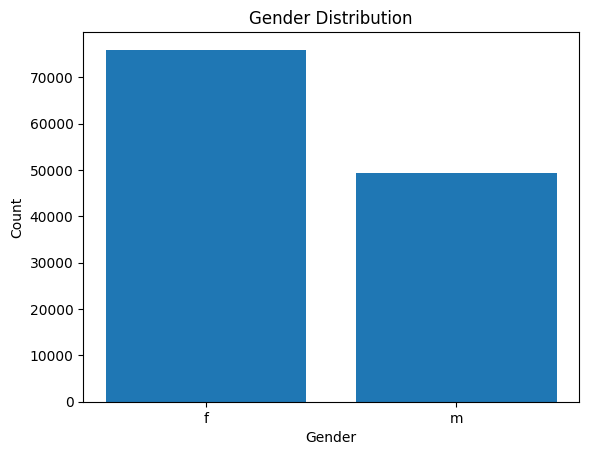

In [5]:
plt.bar(data['gender'].value_counts().index, data['gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [6]:
data['last_letter'] = data['name'].str[-1]
data['last_two_letters'] = data['name'].str[-2:]

In [7]:
data

,name,gender,last_letter,last_two_letters
0,alfiya,f,a,ya
1,ardwin,m,n,in
2,henryka,f,a,ka
3,preeti,f,i,ti
4,jamaro,m,o,ro
...,...,...,...,...
125226,loreatha,f,a,ha
125227,deepa,f,a,pa
125228,kinshasa,f,a,sa
125229,charlianne,f,e,ne


# nltk and last letter

In [ ]:
data_last_letter = [(row['last_letter'], row['gender']) for index, row in data.iterrows()]
data_last_letter

[('a', 'f'),
 ('n', 'm'),
 ('a', 'f'),
 ('i', 'f'),
 ('o', 'm'),
 ('a', 'f'),
 ('q', 'm'),
 ('i', 'f'),
 ('a', 'f'),
 ('y', 'm'),
 ('a', 'f'),
 ('a', 'f'),
 ('l', 'm'),
 ('a', 'f'),
 ('h', 'm'),
 ('a', 'f'),
 ('h', 'm'),
 ('e', 'm'),
 ('a', 'f'),
 ('y', 'f'),
 ('y', 'm'),
 ('h', 'm'),
 ('h', 'f'),
 ('a', 'f'),
 ('i', 'f'),
 ('l', 'f'),
 ('l', 'f'),
 ('s', 'm'),
 ('a', 'm'),
 ('i', 'f'),
 ('a', 'f'),
 ('a', 'f'),
 ('o', 'm'),
 ('a', 'f'),
 ('a', 'f'),
 ('l', 'm'),
 ('h', 'f'),
 ('a', 'f'),
 ('r', 'm'),
 ('l', 'f'),
 ('e', 'm'),
 ('d', 'm'),
 ('n', 'f'),
 ('a', 'm'),
 ('a', 'f'),
 ('y', 'f'),
 ('n', 'f'),
 ('e', 'f'),
 ('n', 'f'),
 ('h', 'm'),
 ('n', 'f'),
 ('a', 'f'),
 ('t', 'm'),
 ('a', 'f'),
 ('l', 'f'),
 ('n', 'f'),
 ('a', 'f'),
 ('y', 'f'),
 ('n', 'm'),
 ('n', 'm'),
 ('e', 'f'),
 ('n', 'm'),
 ('e', 'f'),
 ('n', 'm'),
 ('e', 'f'),
 ('o', 'm'),
 ('n', 'm'),
 ('y', 'f'),
 ('i', 'f'),
 ('y', 'f'),
 ('i', 'm'),
 ('c', 'm'),
 ('y', 'm'),
 ('i', 'f'),
 ('n', 'f'),
 ('n', 'f'),
 ('l', 'm'),

In [ ]:
data_last_letter = [({'last_letter': letter}, gender) for (letter, gender) in data_last_letter]
data_last_letter

[({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'n'}, 'm'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'i'}, 'f'),
 ({'last_letter': 'o'}, 'm'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'q'}, 'm'),
 ({'last_letter': 'i'}, 'f'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'y'}, 'm'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'l'}, 'm'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'h'}, 'm'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'h'}, 'm'),
 ({'last_letter': 'e'}, 'm'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'y'}, 'f'),
 ({'last_letter': 'y'}, 'm'),
 ({'last_letter': 'h'}, 'm'),
 ({'last_letter': 'h'}, 'f'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'i'}, 'f'),
 ({'last_letter': 'l'}, 'f'),
 ({'last_letter': 'l'}, 'f'),
 ({'last_letter': 's'}, 'm'),
 ({'last_letter': 'a'}, 'm'),
 ({'last_letter': 'i'}, 'f'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'a'}, 'f'),
 ({'last_letter': 'o'}, 'm'),
 ({'last_l

In [ ]:
train_set, test_set = train_test_split(data_last_letter, test_size=0.3, random_state=45)

In [ ]:
classifierNB = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
accuracy = nltk.classify.accuracy(classifierNB, test_set)
print("Accuracy after train the model on last two letter:", accuracy*100)

Accuracy after train the model on last two letter: 77.25880755199319


In [ ]:
classifierNB.classify({'last_letter': 'Nikita'[-1]})

'f'

# nltk Last letter + Last two letters

In [ ]:
data_last_two_letter = [(row['last_letter'], row['last_two_letters'], row['gender']) for index, row in data.iterrows()]
data_last_two_letter

[('a', 'ya', 'f'),
 ('n', 'in', 'm'),
 ('a', 'ka', 'f'),
 ('i', 'ti', 'f'),
 ('o', 'ro', 'm'),
 ('a', 'ia', 'f'),
 ('q', 'iq', 'm'),
 ('i', 'vi', 'f'),
 ('a', 'ya', 'f'),
 ('y', 'hy', 'm'),
 ('a', 'sa', 'f'),
 ('a', 'ya', 'f'),
 ('l', 'al', 'm'),
 ('a', 'ia', 'f'),
 ('h', 'th', 'm'),
 ('a', 'ka', 'f'),
 ('h', 'sh', 'm'),
 ('e', 'ne', 'm'),
 ('a', 'na', 'f'),
 ('y', 'by', 'f'),
 ('y', 'ry', 'm'),
 ('h', 'sh', 'm'),
 ('h', 'ah', 'f'),
 ('a', 'na', 'f'),
 ('i', 'ki', 'f'),
 ('l', 'al', 'f'),
 ('l', 'al', 'f'),
 ('s', 'us', 'm'),
 ('a', 'ra', 'm'),
 ('i', 'ri', 'f'),
 ('a', 'ta', 'f'),
 ('a', 'ia', 'f'),
 ('o', 'mo', 'm'),
 ('a', 'la', 'f'),
 ('a', 'ia', 'f'),
 ('l', 'il', 'm'),
 ('h', 'ah', 'f'),
 ('a', 'da', 'f'),
 ('r', 'ar', 'm'),
 ('l', 'el', 'f'),
 ('e', 'le', 'm'),
 ('d', 'id', 'm'),
 ('n', 'an', 'f'),
 ('a', 'ha', 'm'),
 ('a', 'na', 'f'),
 ('y', 'ty', 'f'),
 ('n', 'nn', 'f'),
 ('e', 'ee', 'f'),
 ('n', 'an', 'f'),
 ('h', 'ah', 'm'),
 ('n', 'an', 'f'),
 ('a', 'ia', 'f'),
 ('t', 'lt',

In [ ]:
data_last_two_letter = [({'last_letter': letter, 'last_two': last_two}, gender) for (letter, last_two, gender) in data_last_two_letter]
data_last_two_letter

[({'last_letter': 'a', 'last_two': 'ya'}, 'f'),
 ({'last_letter': 'n', 'last_two': 'in'}, 'm'),
 ({'last_letter': 'a', 'last_two': 'ka'}, 'f'),
 ({'last_letter': 'i', 'last_two': 'ti'}, 'f'),
 ({'last_letter': 'o', 'last_two': 'ro'}, 'm'),
 ({'last_letter': 'a', 'last_two': 'ia'}, 'f'),
 ({'last_letter': 'q', 'last_two': 'iq'}, 'm'),
 ({'last_letter': 'i', 'last_two': 'vi'}, 'f'),
 ({'last_letter': 'a', 'last_two': 'ya'}, 'f'),
 ({'last_letter': 'y', 'last_two': 'hy'}, 'm'),
 ({'last_letter': 'a', 'last_two': 'sa'}, 'f'),
 ({'last_letter': 'a', 'last_two': 'ya'}, 'f'),
 ({'last_letter': 'l', 'last_two': 'al'}, 'm'),
 ({'last_letter': 'a', 'last_two': 'ia'}, 'f'),
 ({'last_letter': 'h', 'last_two': 'th'}, 'm'),
 ({'last_letter': 'a', 'last_two': 'ka'}, 'f'),
 ({'last_letter': 'h', 'last_two': 'sh'}, 'm'),
 ({'last_letter': 'e', 'last_two': 'ne'}, 'm'),
 ({'last_letter': 'a', 'last_two': 'na'}, 'f'),
 ({'last_letter': 'y', 'last_two': 'by'}, 'f'),
 ({'last_letter': 'y', 'last_two': 'ry'}

In [ ]:
train_set2, test_set2 = train_test_split(data_last_two_letter, test_size=0.3, random_state=45)

In [ ]:
classifierNB2 = nltk.NaiveBayesClassifier.train(train_set2)

In [ ]:
accuracy = nltk.classify.accuracy(classifierNB2, test_set2)
print("Accuracy after train the model on last two letter:", accuracy*100)

Accuracy after train the model on last two letter: 80.98687188773201


In [ ]:
classifierNB2.classify({'last_letter': 'Nikita'[-1], 'last_two': 'Nikita'[-2]})

'f'

# Sklearn and last letter

In [ ]:
x_features = data[['last_letter','last_two_letters']]
y_target = data[['gender']]

In [ ]:
le = LabelEncoder()

x_features['last_letter'] = le.fit_transform(x_features['last_letter'])
x_features['last_two_letters'] = le.fit_transform(x_features['last_two_letters'])

y_target['gender'] = le.fit_transform(y_target['gender'])

<ipython-input-88-76f95253cfba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_features['last_letter'] = le.fit_transform(x_features['last_letter'])
<ipython-input-88-76f95253cfba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_features['last_two_letters'] = le.fit_transform(x_features['last_two_letters'])
<ipython-input-88-76f95253cfba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_features, y_target)

X_resampled_df = pd.DataFrame(X_resampled, columns=['last_letter','last_two_letters'])
y_resampled_df = pd.DataFrame(y_resampled, columns=['gender'])

In [ ]:
X_resampled_df.head()

,last_letter,last_two_letters
0,5,439
1,18,169
2,5,200
3,13,365
4,19,331


In [ ]:
X_resampled_df.shape

(151878, 2)

In [ ]:
y_resampled_df.shape

(151878, 1)

In [ ]:
y_resampled_df['gender'].value_counts()

,count
gender,
0,75939
1,75939


In [ ]:
X_last_features = X_resampled_df['last_letter']
X_last_features

,last_letter
0,5
1,18
2,5
3,13
4,19
...,...
151873,9
151874,9
151875,18
151876,16


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_last_features, y_resampled_df, test_size=0.2, random_state=42)

In [ ]:
y_train1.shape

(121502, 1)

In [ ]:
type(x_test1)

pandas.core.series.Series

In [ ]:
x_train1= pd.DataFrame(x_train1, columns=['last_letter'])
x_test1= pd.DataFrame(x_test1, columns=['last_letter'])

In [ ]:
y_train1.shape

(30376, 1)

In [ ]:
gb_model= GaussianNB()

gb_model.fit(x_train1,y_train1)

gb_y_pred = gb_model.predict(x_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy = accuracy_score(y_test1, gb_y_pred)
accuracy

0.7379180932314986

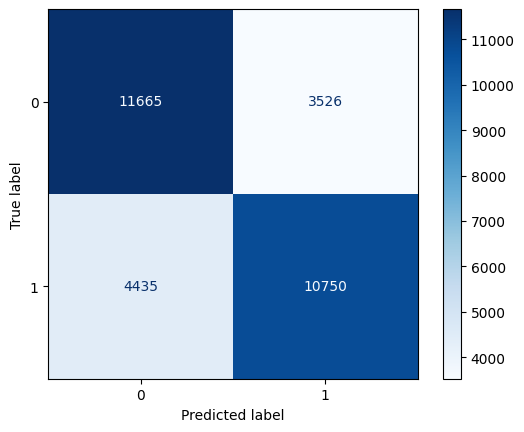

In [ ]:
cm = confusion_matrix(y_test1, gb_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train1,y_train1)
dt_y_pred = dt.predict(x_test1)

In [ ]:
accuracy_dt = accuracy_score(y_test1, dt_y_pred)
accuracy_dt

0.7700816434026864

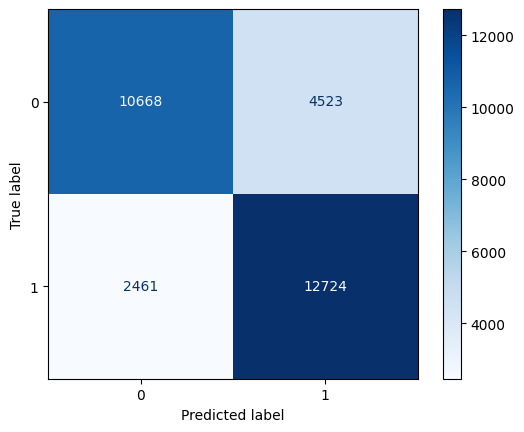

In [ ]:
cm_dt = confusion_matrix(y_test1, dt_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap=plt.cm.Blues)

# Sklearn last letter + last two letters

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)

In [ ]:
gb_model.fit(x_train2,y_train2)

gb_y_pred2 = gb_model.predict(x_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_gb2 = accuracy_score(y_test2, gb_y_pred2)
accuracy_gb2

0.715038188043192

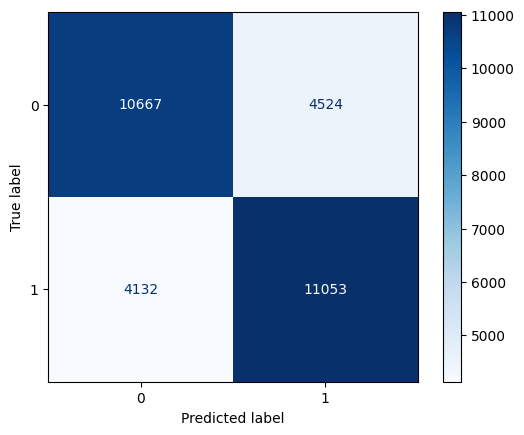

In [ ]:
cm_gb2 = confusion_matrix(y_test2, gb_y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb2)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
dt.fit(x_train2,y_train2)
dt_y_pred2 = dt.predict(x_test2)

In [ ]:
accuracy_dt2 = accuracy_score(y_test2, dt_y_pred2)
accuracy_dt2

0.8130761127205689

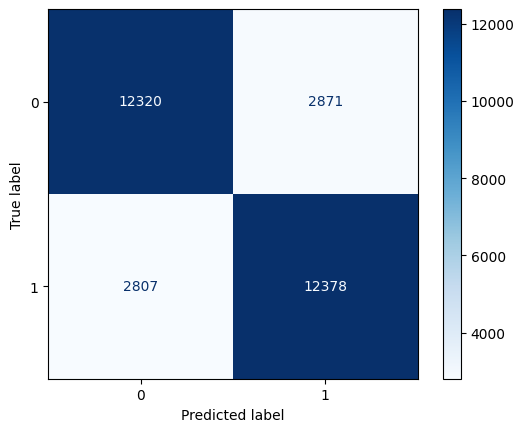

In [ ]:
cm_dt2 = confusion_matrix(y_test2, dt_y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt2)
disp.plot(cmap=plt.cm.Blues)

# Using spacy

In [9]:
import spacy

In [11]:
nlp = spacy.load("en_core_web_sm")

X_train3, y_train3 = zip(*[(row['name'], row['gender']) for index, row in data.iterrows()])

train_texts = list(X_train3)
train_labels = list(y_train3)

In [12]:
train_texts

['alfiya',
 'ardwin',
 'henryka',
 'preeti',
 'jamaro',
 'tkaia',
 'taliq',
 'sanju devi',
 'tralaya',
 'hershy',
 'dlisa',
 'azzareya',
 'anival',
 'vaniecia',
 'aniketh',
 'radhika',
 'mohd nafish',
 'kevine',
 'tybriana',
 'baby',
 'xachary',
 'jaiprakash',
 'azaleyah',
 'daina',
 'jacki',
 'harshita poswal',
 'megha bansal',
 'detravious',
 'sonu mehra',
 'smt rekha mahesvri',
 'laquieta',
 'tenecia',
 'almo',
 'kiyla',
 'aleria',
 'md sakil',
 'nirah',
 'edwarda',
 'ravi rakuwar',
 'mathel',
 'kardale',
 'joshuadavid',
 'teghan',
 'emran kha',
 'reena',
 'caity',
 'darann',
 'livee',
 'lerlean',
 'izaiah',
 'gloriajean',
 'canishia',
 'colt',
 'jolynda',
 'shanteal',
 'cristyn',
 'zakya',
 'aubray',
 'gadsden',
 'faizal hussain',
 'cherokee',
 'brasen',
 'lashanette',
 'arsalaan',
 'prebble',
 'tiofilo',
 'kamerion',
 'cassady',
 'kalawati',
 'haely',
 'kymauri',
 'eric',
 'jacy',
 'hagami',
 'hadlynn',
 'brooklan',
 'trilok agrawal',
 'sunita',
 'kamori',
 'shishram',
 'vishal la

In [13]:
train_labels

['f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'm',
 'f',
 'm',
 'm',
 'f',
 'f',
 'm',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'm',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'm',
 'm',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'm',
 'f',
 'm',
 'f',
 'm',
 'f',
 'm',
 'm',
 'f',
 'f',
 'f',
 'm',
 'm',
 'm',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'm',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'f',
 'm',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'm',
 'f',
 'm',
 'm',
 'f',
 'f',
 'm',
 'f',
 'm',
 'f',
 'm',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f'

In [14]:
train_data = []
for doc in nlp.pipe(train_texts):
    train_data.append({token.text: 1 for token in doc})

print("Length of training data:",len(train_data))
print(train_data[:20])

Length of training data: 125175
[{'alfiya': 1}, {'ardwin': 1}, {'henryka': 1}, {'preeti': 1}, {'jamaro': 1}, {'tkaia': 1}, {'taliq': 1}, {'sanju': 1, 'devi': 1}, {'tralaya': 1}, {'hershy': 1}, {'dlisa': 1}, {'azzareya': 1}, {'anival': 1}, {'vaniecia': 1}, {'aniketh': 1}, {'radhika': 1}, {'mohd': 1, 'nafish': 1}, {'kevine': 1}, {'tybriana': 1}, {'baby': 1}]


In [18]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer()
X_train_vect = vectorizer.fit_transform(train_data)

multi = MultinomialNB()
multi.fit(X_train_vect, train_labels)

MultinomialNB()

In [19]:
test_data = ["Akshay","Rekha"]
text_vect = vectorizer.transform([{token.text:1 for token in nlp(name)} for name in test_data])

In [20]:
predict = multi.predict(text_vect)
print(predict)

['f' 'f']


In [21]:
url = "https://raw.githubusercontent.com/imshibl/Name-Gender-Predictor/refs/heads/main/name_dataset.csv"
data = pd.read_csv(url)
data.head()

,Name,Gender
0,John,Male
1,Mary,Female
2,Michael,Male
3,Jennifer,Female
4,David,Male


In [23]:
male_names = [
    "Abhinav", "Amitabh", "Anand", "Aniket", "Aravind", "Bhavesh", "Chirag", "Darshan", "Dev",
    "Dhruv", "Girish", "Govind", "Hrithik", "Inder", "Jai", "Jayesh", "Kailash", "Lalit", "Mohan",
    "Naveen", "Om", "Pranav", "Rakesh", "Rohan", "Rupesh", "Sameer", "Sanjay", "Tushar", "Uday",
    "Varun", "Vijay", "Vishal", "Yogesh", "Zubin", "Parth", "Raghav", "Samarth", "Tejas", "Nirav",
    'Suresh', 'Pranav', 'Siddharth', 'Vikram', 'Kiran', 'Ajay', 'Bharat', 'Ravi', 'Ashok', 'Dilip',
    'Arvind'
]

female_names = [
    "Aarushi", "Aishwarya", "Amrita", "Anjali", "Ankita", "Bhumika", "Chandni", "Deepika", "Divya",
    "Ekta", "Garima", "Hema", "Isha", "Jhanvi", "Jyoti", "Kajal", "Komal", "Lavanya", "Madhavi",
    "Mira", "Neeta", "Pallavi", "Richa", "Sanya", "Shalini", "Snehal", "Swati", "Tina", "Vaishali",
    "Vidya", "Yamini", "Zoya", "Priyanka", "Ritika", "Tanisha", "Pooja", "Sushmita", "Sonali",
    'Ritu', 'Kavita', 'Priya', 'Lata', 'Deepa', 'Geeta', 'Isha', 'Leela', 'Neha', 'Shreya', 'Kalpana',
    'Lalita'
]

import random
male_names_sample = random.sample(male_names, 50)
female_names_sample = random.sample(female_names, 50)

names = male_names_sample + female_names_sample
genders = ['Male'] * 50 + ['Female'] * 50

data2 = {'Name': names, 'Gender': genders}
df = pd.DataFrame(data2)

df

,Name,Gender
0,Rakesh,Male
1,Dilip,Male
2,Uday,Male
3,Darshan,Male
4,Vishal,Male
...,...,...
95,Ritu,Female
96,Kajal,Female
97,Swati,Female
98,Geeta,Female


In [24]:
data = pd.concat([data, df])
data

,Name,Gender
0,John,Male
1,Mary,Female
2,Michael,Male
3,Jennifer,Female
4,David,Male
...,...,...
95,Ritu,Female
96,Kajal,Female
97,Swati,Female
98,Geeta,Female


In [25]:
data.shape

(385, 2)

In [26]:
data.describe(include="O")

,Name,Gender
count,385,385
unique,370,2
top,Priya,Male
freq,2,202


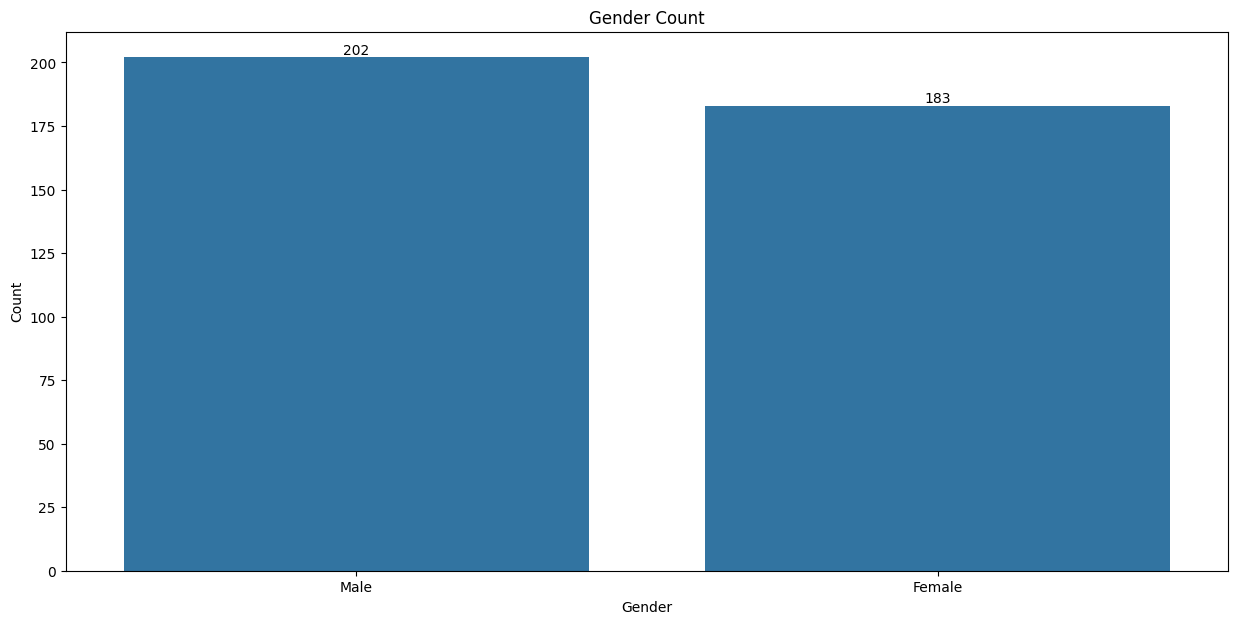

In [27]:
import seaborn as sns

plt.figure(figsize=(15,7))
ax = sns.countplot(x=data.Gender)
ax.bar_label(ax.containers[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

In [28]:
data.isnull().sum()

,0
Name,0
Gender,0


In [29]:
data.Gender = data.Gender.map({"Male":1,"Female":0})

In [30]:
data['Name'] = data['Name'].astype(str).str.lower()

In [31]:
data.head(5)

,Name,Gender
0,john,1
1,mary,0
2,michael,1
3,jennifer,0
4,david,1


In [32]:
data.duplicated().sum()

data.drop_duplicates()
data.shape

(385, 2)

In [33]:
X = data.Name
y = data.Gender

X_train4, X_test4, y_train4, y_test4 = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
X_train4

,Name
165,sanaa khalifa
37,nirav
220,afi
94,sara
232,thomas
...,...
71,parvathy
106,david johnson
270,athif mohammed
63,lalita


In [35]:
X_train4.shape

(308,)

In [36]:
X_test4.shape

(77,)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

model = Pipeline([("vectorizer",TfidfVectorizer(analyzer='char', ngram_range=(3,4))),
                  ("Classifier", MultinomialNB())])

In [39]:
model.fit(X_train4, y_train4)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(3, 4))),
                ('Classifier', MultinomialNB())])

In [40]:
model.score(X_test4, y_test4)*100

72.72727272727273

In [41]:
name = ["Viraj"]
pred = model.predict(name)
if pred == 0:
    print("Female")
else:
    print("Male")

Male


In [42]:
name = ["Payal"]
pred = model.predict(name)
if pred == 0:
    print("Female")
else:
    print("Male")

Female


In [43]:
import pickle
with open('Gender_Classification.pkl', 'wb') as f:
    pickle.dump(model, f)

In [53]:
def classify(name):
    model = pickle.load(open("Gender_Classification.pkl","rb"))
    a=model.predict(name)
    if a == 0:
        return "Female"
    else:
        return "Male"

In [60]:
classify(["Nikita"])

'Female'